## **Problem statement**

### ***Context***

##### **Part A :**
A communications equipment manufacturing company has a product that is responsible for emitting informative signals.
The company wants to build a machine learning model that can help the company predict the equipment’s signal quality using various parameters.

##### **Part B :**
Recognizing multi-digit numbers in photographs captured at street level is an important component of modern-day map making.
A classic example of a corpus of such street-level photographs is Google's Street View imagery, composed of hundreds of millions of geo-located 360-degree panoramic images.

The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents.

More broadly, recognizing numbers in photographs is a problem of interest to the optical character recognition (OCR) community.

While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs remains highly challenging.
This difficulty arises due to the wide variability in the visual appearance of text in the wild — considering a large range of fonts, colors, styles, orientations, and character arrangements.

The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, occlusions, and by image acquisition factors like resolution, motion, and focus blurs.

In this project, we will use a dataset with images centered around a single digit (many images contain distractors at the sides). Although we are taking a sample of the data which is simpler, it is still more complex than MNIST because of these distractors.

### **Objective**




##### **Part A:**
To build a classifier that can use the given parameters to determine the signal strength or quality.

##### **Part B:**
To build a digit classifier on the SVHN (Street View House Number) dataset.

### **Data Dictionary:**

##### **Part A:**
The dataset contains information on various signal tests performed:

**Parameters:** Various measurable signal parameters.

**Signal_Quality:**  Final signal strength or quality.

##### **Part B:**
The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with minimal data formatting requirements.
It originates from a significantly harder, unsolved, real-world problem: recognizing digits and numbers in natural scene images.

SVHN is obtained from house numbers captured in Google Street View images.

The labels for each of these images represent the prominent number visible in the image (e.g., 2, 6, 7, and 4 respectively).

## **Part A**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
### Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from sklearn.metrics import confusion_matrix,accuracy_score
import warnings
import random
random.seed(1)
tf.random.set_seed(1)
warnings.filterwarnings('ignore')

In [ ]:
#loading the data
data=pd.read_csv("/content/drive/MyDrive/NN Project Data - Signal.csv")
data.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Q1.B – Missing‐value check (% per column)
missing = data.isna().sum()
pct_missing = (missing / len(data) * 100).round(2)
pd.concat([missing, pct_missing], axis=1, keys=['MissingCount','PctMissing'])


,MissingCount,PctMissing
Parameter 1,0,0.0
Parameter 2,0,0.0
Parameter 3,0,0.0
Parameter 4,0,0.0
Parameter 5,0,0.0
Parameter 6,0,0.0
Parameter 7,0,0.0
Parameter 8,0,0.0
Parameter 9,0,0.0
Parameter 10,0,0.0


In [ ]:
data.tail()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
data.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# Q1.C – Duplicates & imputation
print("Duplicates before:", data.duplicated().sum())
data = data.drop_duplicates().reset_index(drop=True)
# impute missing values with mean
data[data.select_dtypes('number').columns] = data.select_dtypes('number').fillna(data.mean())
print("Duplicates after:", data.duplicated().sum())

Duplicates before: 240
Duplicates after: 0


In [ ]:
len(data)

1359

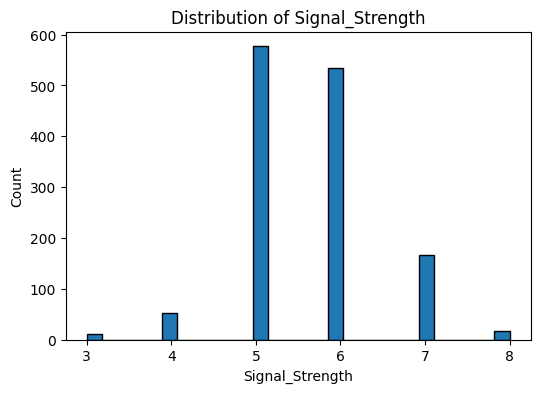

In [ ]:
# Q1.D – Visualize target distribution
plt.figure(figsize=(6,4))
plt.hist(data['Signal_Strength'], bins='auto', edgecolor='k')
plt.title('Distribution of Signal_Strength')
plt.xlabel('Signal_Strength')
plt.ylabel('Count')
plt.show()

In [ ]:
data['Signal_Strength'].value_counts()

,count
Signal_Strength,
5,577
6,535
7,167
4,53
8,17
3,10


### Q1.E – Insights    
1. **240 duplicate rows** existed and were imputed with mean to avoid bias and to preserve the distribution center
2. The target **Signal_Strength** is heavily concentrated at values 5 and 6 (≈75% of samples), with very few at extremes (3, 8), suggesting a mild class‐imbalance.
3. Data is having severe imbalance with Classes 3, 4, and 8 have very few samples compared to 5, 6, 7. so Model will be biased towards majority classes (5 and 6).

In [ ]:
# Q2.A – Split into X & y
X = data.drop('Signal_Strength', axis=1)
y = data['Signal_Strength']

In [ ]:
# Q2.B – 70:30 train&test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3,stratify=y, random_state=42)

In [ ]:
# Q2.C – Print shapes to verify
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)



X_train: (951, 11)
X_test : (408, 11)
y_train: (951,)
y_test : (408,)


In [ ]:
# Q2.D – Normalize features with Standardscaler
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm  = scaler.transform(X_test)

In [ ]:
# Q2.E – Encode labels for NN (one-hot)
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train_enc = lb.fit_transform(y_train)
y_test_enc  = lb.transform(y_test)
print("Encoded label shape (train):", y_train_enc.shape)

Encoded label shape (train): (951, 6)


In [ ]:
# Q3.A – Build initial NN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer

input_dim  = X_train_norm.shape[1]
output_dim = y_train_enc.shape[1]

model1 = Sequential()
model1.add(InputLayer(input_shape=(input_dim,)))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(output_dim, activation='softmax'))

model1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,046 (11.90 KB)

 Trainable params: 3,046 (11.90 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Q3.B – Train model1
history1 = model1.fit(
    X_train_norm, y_train_enc,
    validation_split=0.2,
    epochs=30,
    batch_size=32
)

Epoch 1/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.2210 - loss: 1.8031 - val_accuracy: 0.4712 - val_loss: 1.3769
Epoch 2/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5557 - loss: 1.2882 - val_accuracy: 0.5602 - val_loss: 1.1492
Epoch 3/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5964 - loss: 1.0723 - val_accuracy: 0.5864 - val_loss: 1.0620
Epoch 4/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6109 - loss: 0.9879 - val_accuracy: 0.6073 - val_loss: 1.0182
Epoch 5/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6173 - loss: 0.9496 - val_accuracy: 0.6230 - val_loss: 0.9913
Epoch 6/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6277 - loss: 0.9269 - val_accuracy: 0.6021 - val_loss: 0.9743
Epoch 7/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6347 - loss: 0.9102 - val_accuracy: 0.5969 - val_loss: 0.9627
Epoch 8/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6369 - loss: 0.8967 - val_accuracy: 0.6126 - val_loss

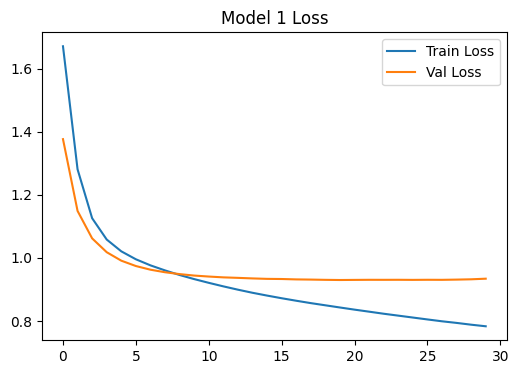

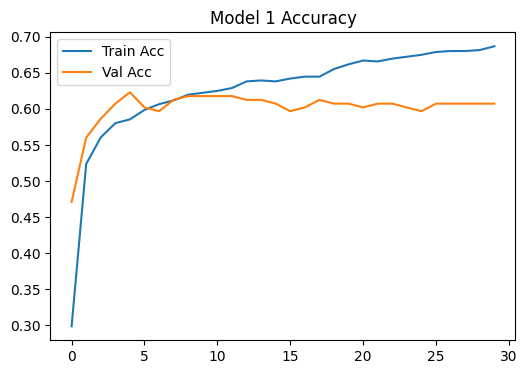

In [ ]:
# Q3.C – Plot model1’s Loss & Accuracy
import matplotlib.pyplot as plt

# Training vs Validation Loss
plt.figure(figsize=(6,4))
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Val Loss')
plt.title('Model 1 Loss');
 plt.legend();
 plt.show()

# Training vs Validation Accuracy
plt.figure(figsize=(6,4))
plt.plot(history1.history['accuracy'], label='Train Acc')
plt.plot(history1.history['val_accuracy'], label='Val Acc')
plt.title('Model 1 Accuracy');
plt.legend();
plt.show()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,950 (42.77 KB)

 Trainable params: 10,566 (41.27 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.2123 - loss: 2.3853 - val_accuracy: 0.5602 - val_loss: 1.6177 - learning_rate: 0.0010
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4210 - loss: 1.7666 - val_accuracy: 0.5654 - val_loss: 1.4554 - learning_rate: 0.0010
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4922 - loss: 1.5419 - val_accuracy: 0.6178 - val_loss: 1.3358 - learning_rate: 0.0010
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5293 - loss: 1.4847 - val_accuracy: 0.6126 - val_loss: 1.2502 - learning_rate: 0.0010
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5309 - loss: 1.4823 - val_accuracy: 0.6073 - val_loss: 1.1883 - learning_rate: 0.0010
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5426 - loss: 1.3321 - val_accuracy: 0.6126 - val_loss: 1.1456 - learning_rate: 0.0010
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5947 - loss: 1.2323 - val_ac

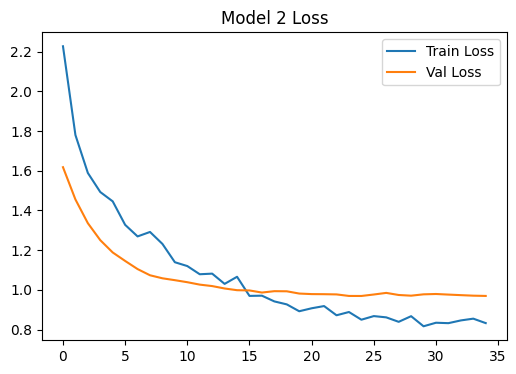

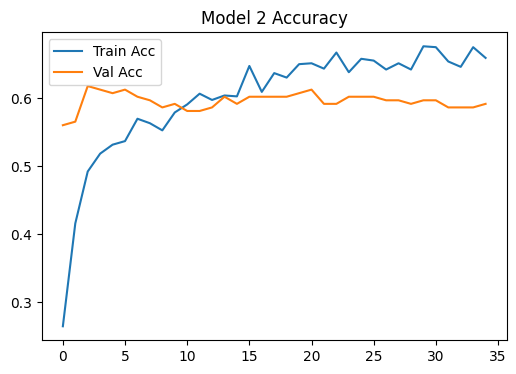

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

input_dim = X_train_norm.shape[1]
output_dim = y_train_enc.shape[1]

# Improved Model Architecture (Model 2)
model2 = Sequential()
model2.add(InputLayer(input_shape=(input_dim,)))
model2.add(Dense(128, activation='relu', kernel_regularizer=l2(0.0001)))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))

model2.add(Dense(64, activation='relu', kernel_regularizer=l2(0.0001)))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))

model2.add(Dense(output_dim, activation='softmax'))

# Compile the improved model
model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model2.summary()

# Define callbacks for improved training
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Train the improved model
history2 = model2.fit(
    X_train_norm, y_train_enc,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr]
)

# Q3.D – Plot model2’s Loss & Accuracy
import matplotlib.pyplot as plt

# Training vs Validation Loss for Model 2
plt.figure(figsize=(6,4))
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Val Loss')
plt.title('Model 2 Loss');
plt.legend();
plt.show()

# Training vs Validation Accuracy for Model 2
plt.figure(figsize=(6,4))
plt.plot(history2.history['accuracy'], label='Train Acc')
plt.plot(history2.history['val_accuracy'], label='Val Acc')
plt.title('Model 2 Accuracy');
plt.legend();
plt.show()

#### **Observations:**
1. Both models reached a point where their accuracy on new, unseen data (the validation set) didn't get much better after a certain number of training steps. Model 1 stopped around 60-62% accuracy, and Model 2 also stopped improving in a similar range.
2. : Even though their performance on new data wasn't improving much, both models kept getting better at predicting the data they had already seen during training.The reason for this may be a mild class imbalance training data so it's not giving generalized predictions for the samples with tragets containing 3,4,7,8

## **Part B**##

In [ ]:
# Importing required libraries
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from sklearn.model_selection import train_test_split


In [ ]:

# Load the SVHN dataset
file_path = '/content/drive/MyDrive/Autonomous_Vehicles_SVHN_single_grey1.h5'

# Read the .h5 file and assign to a variable (Q1.A)
with h5py.File(file_path, 'r') as data:
    # Print all the keys from the .h5 file (Q1.B)
    print("Keys in the .h5 file:", list(data.keys()))

Keys in the .h5 file: ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [ ]:
import h5py
import numpy as np

# Load the SVHN dataset
file_path = '/content/drive/MyDrive/Autonomous_Vehicles_SVHN_single_grey1.h5'

with h5py.File(file_path, 'r') as data:
    X_train = np.array(data['X_train'])
    y_train = np.array(data['y_train'])
    X_test = np.array(data['X_test'])
    y_test = np.array(data['y_test'])

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (42000, 32, 32)
y_train shape: (42000,)
X_test shape: (18000, 32, 32)
y_test shape: (18000,)


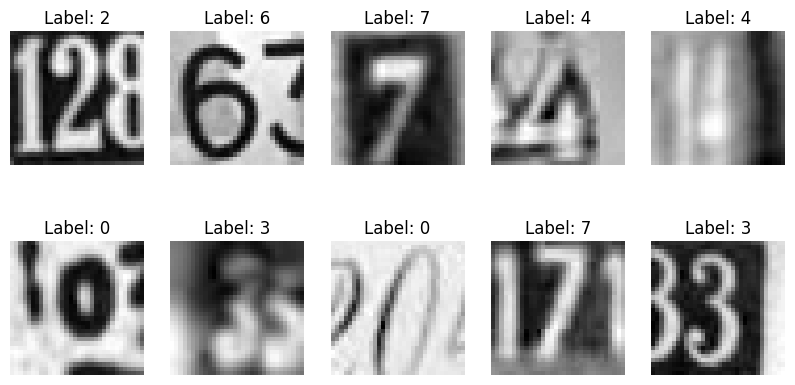

In [ ]:
import matplotlib.pyplot as plt

# Visualize first 10 images in train data
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [ ]:
#Q2 C- reshaping all the images into 32x32 grayscale
X_train = X_train.reshape(-1, 32, 32, 1)
X_test = X_test.reshape(-1, 32, 32, 1)

In [ ]:
# Q2 D -Normalize pixel values to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
#Q2 E - Transform Labels into format acceptable by Neural Network
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
#Q2 F - Print total Number of classes in the Dataset.
num_classes = y_train.shape[1]
print("Total number of classes:", num_classes)

Total number of classes: 10


In [ ]:
#Q3 A - Design a Neural Network to train a classifier.
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping


model = Sequential()
model.add(Flatten(input_shape=(32, 32, 1)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=20, batch_size=64,
                    validation_split=0.2, callbacks=[early_stopping])



Epoch 1/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.1053 - loss: 2.3315 - val_accuracy: 0.1307 - val_loss: 2.2537
Epoch 2/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.1237 - loss: 2.2573 - val_accuracy: 0.1320 - val_loss: 2.2389
Epoch 3/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.1190 - loss: 2.2521 - val_accuracy: 0.1730 - val_loss: 2.1663
Epoch 4/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.1740 - loss: 2.1534 - val_accuracy: 0.2249 - val_loss: 2.0448
Epoch 5/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.1860 - loss: 2.1047 - val_accuracy: 0.2254 - val_loss: 2.0350
Epoch 6/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.1879 - loss: 2.0974 - val_accuracy: 0.2232 - val_loss: 2.0300
Epoch 7/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.1902 - loss: 2.0930 - val_accuracy: 0.2227 - val_loss: 2.0170
Epoch 8/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.1931 - loss: 2.0880 - va

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Test Loss: 1.7074909210205078
Test Accuracy: 0.4423888921737671


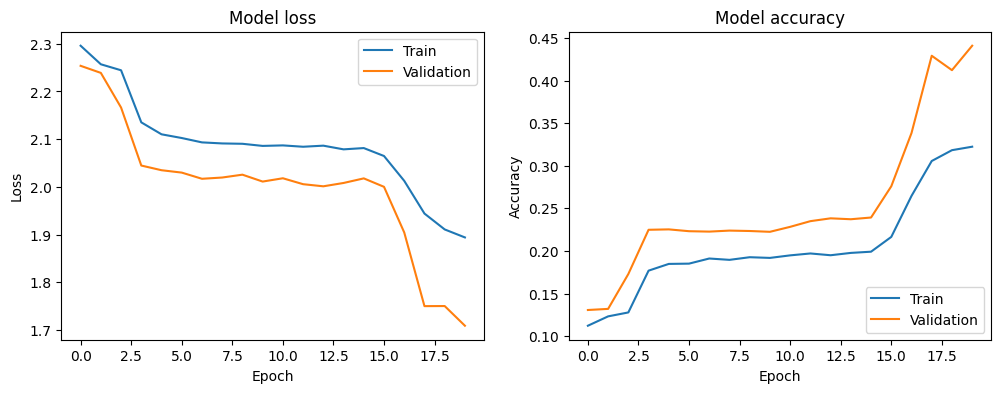

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.show()

Epoch 1/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.2841 - loss: 2.2419 - val_accuracy: 0.3568 - val_loss: 2.0094 - learning_rate: 0.0010
Epoch 2/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.5032 - loss: 1.5911 - val_accuracy: 0.6050 - val_loss: 1.3104 - learning_rate: 0.0010
Epoch 3/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.5433 - loss: 1.4831 - val_accuracy: 0.5523 - val_loss: 1.4448 - learning_rate: 0.0010
Epoch 4/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.5610 - loss: 1.3989 - val_accuracy: 0.5580 - val_loss: 1.4022 - learning_rate: 0.0010
Epoch 5/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.5944 - loss: 1.3135 - val_accuracy: 0.6620 - val_loss: 1.1035 - learning_rate: 5.0000e-04
Epoch 6/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.6068 - loss: 1.2716 - val_accuracy: 0.6587 - val_loss: 1.0937 - learning_rate: 5.0000e-04
Epoch 7/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step 

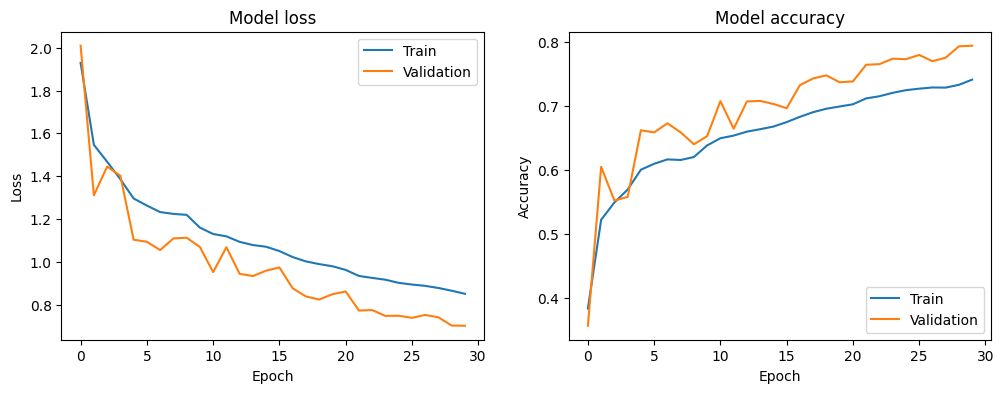

In [ ]:
 from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2


# Updated model architecture
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 1)))
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-5)

history = model.fit(X_train, y_train, epochs=30, batch_size=32,
                    validation_split=0.2, callbacks=[early_stopping, reduce_lr])


# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)



plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.show()

#### **Observations:**
1. The improved model achieves a higher test accuracy (around 80%) and lower test loss (around 0.70) compared to the initial model (roughly 44% accuracy and 1.70 loss), has a clear advantage in learning and generalization.
2. The close results between the final validation accuracy (around 74%) and the test accuracy (around 80%) in the improved model indicates robust generalization to unseen data, suggesting the implemented regularization techniques and training strategies were successful in reducing overfitting,
